Cropped Image size: (511, 511) (Height, Width)


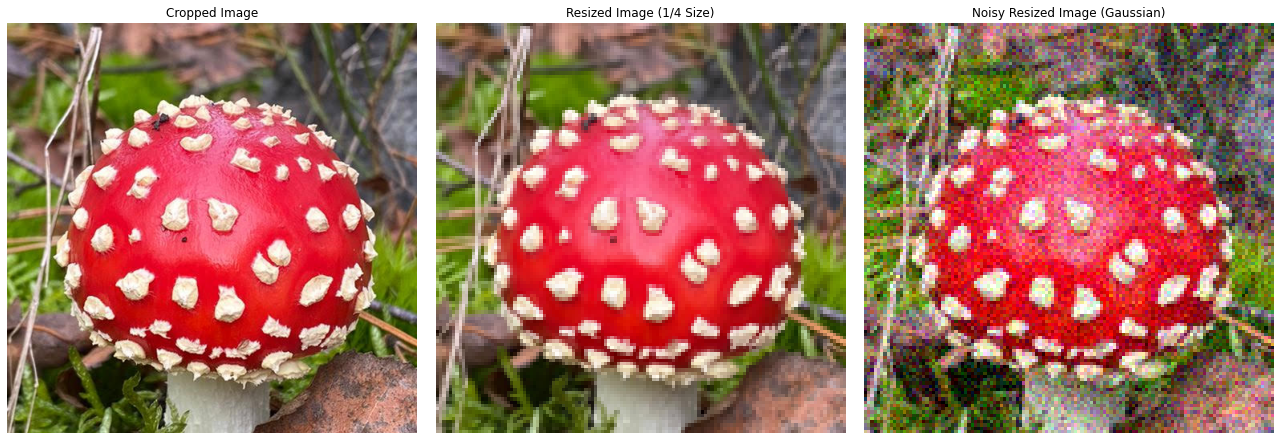

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = Image.open("redmushroom.jpeg").convert("RGB")
image_np = np.array(image) / 255.0  # Normalize to [0, 1]

# Crop a specific region of the image (rows 800 to 1311, columns 513 to 1024)
image_np_cropped = image_np[800:1311, 513:1024]

# Print cropped image size (height, width, channels)
print(f"Cropped Image size: {image_np_cropped.shape[:2]} (Height, Width)")

# Resize the cropped image by 1/4 of its original size
image_resized = Image.fromarray((image_np_cropped * 255).astype(np.uint8))  # Convert to uint8
new_size = (image_resized.width // 4, image_resized.height // 4)  # 1/4 of original dimensions
image_resized = image_resized.resize(new_size)

# Convert resized image to numpy array and normalize
image_resized_np = np.array(image_resized) / 255.0

# Add Gaussian noise to the resized image
mean = 0
std = 0.1
noise = np.random.normal(mean, std, image_resized_np.shape)
noisy_image_resized = np.clip(image_resized_np + noise, 0, 1)  # Keep values in [0, 1]

# Show original cropped, resized, and noisy resized images side-by-side
plt.figure(figsize=(18, 6))

# Cropped image
plt.subplot(1, 3, 1)
plt.imshow(image_np_cropped)
plt.title("Cropped Image")
plt.axis("off")

# Resized image
plt.subplot(1, 3, 2)
plt.imshow(image_resized_np)
plt.title("Resized Image (1/4 Size)")
plt.axis("off")

# Noisy resized image
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_resized)
plt.title("Noisy Resized Image (Gaussian)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save the resized and noisy resized images
image_resized.save("resized_redmushroom_cropped.png")
Image.fromarray((noisy_image_resized * 255).astype(np.uint8)).save("noisy_resized_redmushroom_cropped.png")


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 30 to 50 random x values in first quadrant
num_points = np.random.randint(30, 51)
x = np.sort(np.random.uniform(0, 10, num_points))

# Define a quadratic function and add noise
true_func = lambda x: 0.5 * x**2 - 2 * x + 3
noise = np.random.normal(0, 5, size=num_points)
y = true_func(x) + noise
y = np.clip(y, 0, None)  # Keep y in first quadrant

# Fit a quadratic polynomial
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate fitted curve
x_curve = np.linspace(0, max(x), 200)
y_curve = poly(x_curve)

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data points and fitted curve
ax.scatter(x, y, color='orange', edgecolor='black', s=60)
ax.plot(x_curve, y_curve, color='blue', linewidth=3)

# Set limits to show only first quadrant
x_max = max(x) * 1.1
y_max = max(y_curve) * 1.1
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Remove all spines and ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Axis labels with large font
ax.set_xlabel("X", fontsize=30, labelpad=20)
ax.set_ylabel("Y", fontsize=30, labelpad=20)

# Remove legend
if ax.get_legend():
    ax.get_legend().remove()

# Add custom arrowed axes
arrowprops = dict(arrowstyle='->', linewidth=3, color='black', shrinkA=0, shrinkB=0)
ax.annotate('', xy=(x_max, 0), xytext=(0, 0), arrowprops=arrowprops)
ax.annotate('', xy=(0, y_max), xytext=(0, 0), arrowprops=arrowprops)

# Save the image
plt.tight_layout()
plt.savefig("regression_plot.png", dpi=300)
plt.close()
